In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

## ANÁLISIS DE LA CORRELACIÓN ENTRE FACTORES SOCIODEMOGRÁFICOS Y LA DESERCIÓN ESCOLAR EN MÉXICO DURANTE EL CICLO ESCOLAR 2019-2020

***Objetivo:***

Determinar la correlación entre los factores sociodemográficos y el abandono escolar de los estudiantes de México durante el ciclo escolar 2019-2020, mediante la metodología de análisis descriptivo estadístico y modelos de Aprendizaje Máquina, con la finalidad de conocer el perfil sociodemográfico de un alumno que abandonó sus estudios en el ciclo escolar donde comenzó la pandemia


### 1. EXTRACCIÓN

***Fuente de datos:***

La Encuesta para la Medición del Impacto COVID-19 en la Educación (ECOVID-ED) 2020 se llevó a cabo de manera especial con el objetivo de conocer el impacto de la cancelación provisional de clases presenciales en las instituciones educativas del país para evitar los contagios por la pandemia COVID-19 en la experiencia educativa de niños, niñas, adolescentes y jóvenes de 3 a 29 años, tanto en el ciclo escolar 2019- 2020, como en ciclo 2020-2021.

**Diccionarios de datos**

ECOVID-ED 2020 se compone de dos encuestas tmodulo y tvivienda con los siguientes datos

In [3]:
#Diccionario de datos tmodulo
ecovid_ed_dic = pd.read_csv('conjunto_de_datos_ecovid_ed_2020_csv/conjunto_de_datos_tmodulo_ecovid_ed_2020/diccionario_de_datos/diccionario_datos_tmodulo_ecovid_ed_2020.csv')
ecovid_ed_dic.head(75)

,nombre_campo,longitud,tipo,nemónico,catálogo,rango_claves
0,Entidad,2,C,ent,ent,01…32
1,Número de control,9,C,con,NaN,01E10011…32E18098
2,Número de renglón,2,C,n_ren,NaN,01…30
3,Pregunta PAREN ¿Qué es usted de (NOMBRE)?,1,C,paren,paren,1...8
4,Pregunta SEXO ¿(NOMBRE) es?,1,C,sexo,sexo,"1,2"
5,Pregunta EDAD ¿Cuántos años cumplidos tiene (NOMBRE)?,2,C,edad,edad,00…99
6,Pregunta NIV ¿(NOMBRE) hasta qué año aprobó en la escuela?,1,C,niv,niv,0…9
7,Pregunta GRA ¿(NOMBRE) hasta qué grado aprobó en la escuela?,2,C,gra,NaN,00…09
8,Pregunta P3.5 ¿(NOMBRE) estuvo inscrito(a) en el pasado año escolar 2019-2020?,1,C,p3_5,p3_5,"1,2"
9,Pregunta P3.6 ¿La escuela donde (NOMBRE) estudió el pasado año escolar fue?,1,C,p3_6,p3_6,"1,2"


In [4]:
#Dicionario de datos tvivienda
ecovid_ed_dic = pd.read_csv('conjunto_de_datos_ecovid_ed_2020_csv/conjunto_de_datos_tvivienda_ecovid_ed_2020/diccionario_de_datos/diccionario_datos_tvivienda_ecovid_ed_2020.csv')
ecovid_ed_dic.head(72)

,nombre_campo,longitud,tipo,nemónico,catálogo,rango_claves
0,Entidad,2,C,ent,ent,01…32
1,Número de control,9,C,con,NaN,01E10011…32E18098
2,Pregunta TOT.PER ¿Cuántas personas viven normalmente en su vivienda contando a los niños pequeños y los ancianos?,2,C,tot_per,tot_per,"01…30,99"
3,"Pregunta TOT.HOM Del total de personas en su vivienda, ¿cuántas son hombres?",2,C,tot_hom,tot_hom,00…30
4,Pregunta P1.3.H1 ¿Cuántos años tiene?,2,C,p1_3_h1,p1_3_h1,00…99
5,Pregunta P1.3.H2 ¿Cuántos años tiene?,2,C,p1_3_h2,p1_3_h2,00…99
6,Pregunta P1.3.H3 ¿Cuántos años tiene?,2,C,p1_3_h3,p1_3_h3,00…99
7,Pregunta P1.3.H4 ¿Cuántos años tiene?,2,C,p1_3_h4,p1_3_h4,00…99
8,Pregunta P1.3.H5 ¿Cuántos años tiene?,2,C,p1_3_h5,p1_3_h5,00…99
9,Pregunta P1.3.H6 ¿Cuántos años tiene?,2,C,p1_3_h6,p1_3_h6,00…99


In [5]:
# Cargado de datast de tmodulo
tmodulo_df = pd.read_csv('conjunto_de_datos_ecovid_ed_2020_csv/conjunto_de_datos_tmodulo_ecovid_ed_2020/conjunto_de_datos/conjunto_de_datos_tmodulo_ecovid_ed_2020.csv')
tmodulo_df

,ENT,CON,N_REN,PAREN,SEXO,EDAD,NIV,GRA,P3_5,P3_6,...,P3_22,P3_23,P3_24,P3_25_1,P3_25_2,P3_25_3,P3_25_4,P3_25_5,P3_26,FACTOR
0,1,01E10011,2,1,1,9,2,4,1,1.0,...,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4,1374
1,1,01E10011,3,6,2,28,3,3,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1374
2,1,01E10028,1,1,1,8,2,2,1,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,887
3,1,01E10028,2,1,2,17,3,3,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,887
4,1,01E10028,3,1,1,19,3,3,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11075,32,32E18089,1,1,1,5,1,2,1,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1716
11076,32,32E18089,2,1,2,5,1,2,1,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1716
11077,32,32E18089,3,1,2,11,2,5,1,1.0,...,6.0,2.0,NaN,0.0,1.0,0.0,0.0,0.0,1,1716
11078,32,32E18098,1,5,1,22,7,2,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1154


In [6]:
# Cargado de dataset de tvivienda
tvivienda_df = pd.read_csv('conjunto_de_datos_ecovid_ed_2020_csv/conjunto_de_datos_tvivienda_ecovid_ed_2020/conjunto_de_datos/conjunto_de_datos_tvivienda_ecovid_ed_2020.csv')
tvivienda_df

,ENT,CON,TOT_PER,TOT_HOM,P1_3_H1,P1_3_H2,P1_3_H3,P1_3_H4,P1_3_H5,P1_3_H6,...,P4_3_1,P4_3_2,P4_3_3,P4_3_4,P4_3_5,P4_3_6,P4_3_7,P4_3_8,P4_3_9,FACTOR
0,1,01E10011,4,3,2.0,9.0,32.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1374
1,1,01E10028,6,3,8.0,19.0,43.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,887
2,1,01E10030,3,1,60.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1450
3,1,01E10080,6,2,14.0,46.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,941
4,1,01E10098,5,2,9.0,30.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,32,32E18031,5,3,18.0,13.0,40.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1659
5468,32,32E18040,4,3,12.0,36.0,8.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2403
5469,32,32E18046,1,1,32.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3857
5470,32,32E18089,6,2,45.0,5.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1716


In [7]:
#Generamos un dataset que combine tmodulo y tvivienda uniéndolos a través de la columna CONm la cual es un identificador de control
tmodulo_df = tmodulo_df.merge(tvivienda_df, on='CON')

### Análisis descriptivo

In [8]:
#Un vistazo a los datos
tmodulo_df.head()

,ENT_x,CON,N_REN,PAREN,SEXO,EDAD,NIV,GRA,P3_5,P3_6,...,P4_3_1,P4_3_2,P4_3_3,P4_3_4,P4_3_5,P4_3_6,P4_3_7,P4_3_8,P4_3_9,FACTOR_y
0,1,01E10011,2,1,1,9,2,4,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1374
1,1,01E10011,3,6,2,28,3,3,2,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1374
2,1,01E10028,1,1,1,8,2,2,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,887
3,1,01E10028,2,1,2,17,3,3,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,887
4,1,01E10028,3,1,1,19,3,3,2,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,887


In [9]:
#tipos de datos
tmodulo_df.dtypes

ENT_x         int64
CON          object
N_REN         int64
PAREN         int64
SEXO          int64
EDAD          int64
NIV           int64
GRA           int64
P3_5          int64
P3_6        float64
P3_7        float64
P3_8        float64
P3_9_1      float64
P3_9_2      float64
P3_9_3      float64
P3_9_4      float64
P3_9_5      float64
P3_9_6      float64
P3_9_7      float64
P3_9_8      float64
P3_9_9      float64
P3_10       float64
P3_11       float64
P3_12_1     float64
P3_12_2     float64
P3_12_3     float64
P3_12_4     float64
P3_12_5     float64
P3_12_6     float64
P3_12_7     float64
P3_12_8     float64
P3_12A      float64
P3_13       float64
P3_14         int64
P3_15       float64
P3_16       float64
P3_17_1     float64
P3_17_2     float64
P3_17_3     float64
P3_17_4     float64
P3_17_5     float64
P3_17_6     float64
P3_17_7     float64
P3_17_8     float64
P3_18       float64
P3_19_1     float64
P3_19_2     float64
P3_19_3     float64
P3_19_4     float64
P3_19_5     float64


Los datos correspondientes a las respuestas de las preguntas ya se encuentran codificados a valores numéricos. Esto facilitará el análisis de correlación

***La variable a predecir*** se encuentra en la columna P3_7 que se refiere a la pregunta:

Pregunta P3.7 ¿(NOMBRE) concluyó el pasado año escolar (2019/2020)?


In [10]:
#Verificación de nulos o vacíos en la variable a predecir
tmodulo_df['P3_7'].isnull().sum()

4044

In [11]:
# Removemos los valores nulos que se refieren a la variable a predecir
tmodulo_df_cleaned = tmodulo_df.copy()
tmodulo_df_cleaned = tmodulo_df_cleaned[tmodulo_df_cleaned.P3_7 > 0.0]
tmodulo_df_cleaned['P3_7'].isnull().sum()

0

In [12]:
#Otros valores que tengan nan se reemplazan con su media
for column in tmodulo_df_cleaned.columns:
    if tmodulo_df_cleaned.dtypes[column] != 'object':
        column_mean = tmodulo_df_cleaned[column].mean()
        tmodulo_df_cleaned[column].fillna(value=column_mean,inplace=True)


1.0    6882
2.0     154
Name: P3_7, dtype: int64

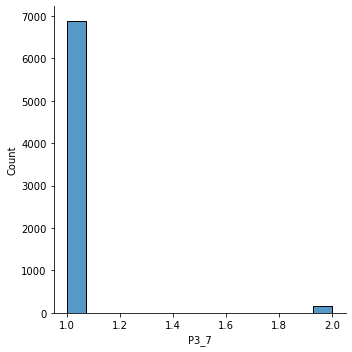

In [13]:
#Verificamos la distribución de la variable a predecir
sns.displot(data=tmodulo_df_cleaned, x="P3_7")
tmodulo_df_cleaned['P3_7'].value_counts()

El valor de 1 se refiere a que no abandonó sus estudios, el valor de 2 que sí

La distribución de deserción se encuentra sesgada puesto que la mayoría de los alumnos no abandonaron sus estudios, quizás sea necesario unsubmuestreo para determinar con más exactitud los factores sociodemográficos que determinan la deserción escolar.

**Distribución de los datos**

Revisando los diccionarios de datos, descubrimos que NIV se refiere a nivel educativo y GRA se refiere al grado del nivel educativo. Es posible combinarlos en una columna que se refiera a NIV-GRAD.

Distribución de niveles educativos:

* "0","Ninguno"
* "1","Preescolar"
* "2","Primaria"
* "3","Secundaria"
* "4","Carrera técnica con secundaria terminada"
* "5","Preparatoria o bachillerato"
* "6","Carrera técnica con preparatoria terminada"
* "7","Licenciatura o profesional"
* "8","Maestría"
* "9","Doctorado"



In [14]:
tmodulo_df_cleaned['niv-gra'] = tmodulo_df_cleaned['NIV']*10 + tmodulo_df_cleaned['GRA']
tmodulo_df_cleaned[['niv-gra','NIV', 'GRA']].drop_duplicates().sort_values(by='niv-gra')

,niv-gra,NIV,GRA
87,0,0,0
154,11,1,1
7,12,1,2
11,13,1,3
33,21,2,1
2,22,2,2
12,23,2,3
0,24,2,4
41,25,2,5
74,26,2,6


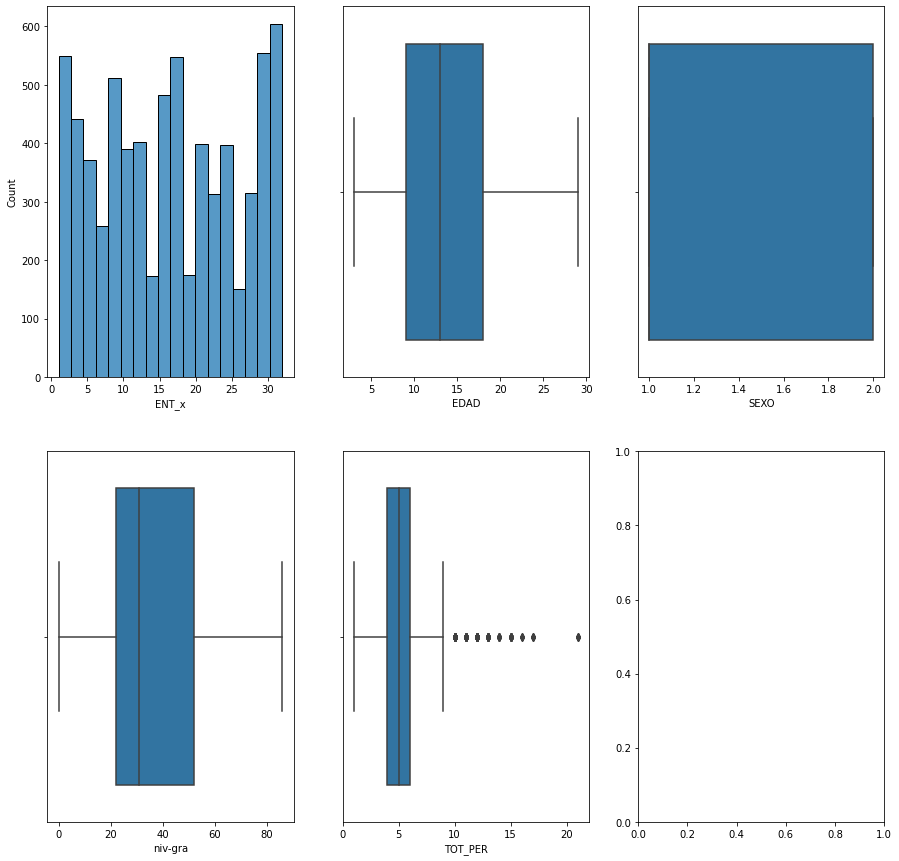

In [15]:
columns_for_checking_dist = ['ENT_x','EDAD', 'SEXO', 'niv-gra', 'TOT_PER']
n_cols = 3
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(15,15))
for i, column in enumerate(columns_for_checking_dist):
    if column == 'ENT_x':
        sns.histplot(x= tmodulo_df_cleaned[column], ax=axes[i//n_cols,i%n_cols])
    else:
        sns.boxplot(x= tmodulo_df_cleaned[column], ax=axes[i//n_cols,i%n_cols])

La encuesta tiene un sesgo a la izquierda respecto al número de personas que habitan en el hogar, y en el nivel educativo pareciera ser una distribución un poco sesgada a la izquierda. La edad y el sexo parece que si siguen una distribución normal

**Distribución de datos para el caso en que SI hubo deserción**

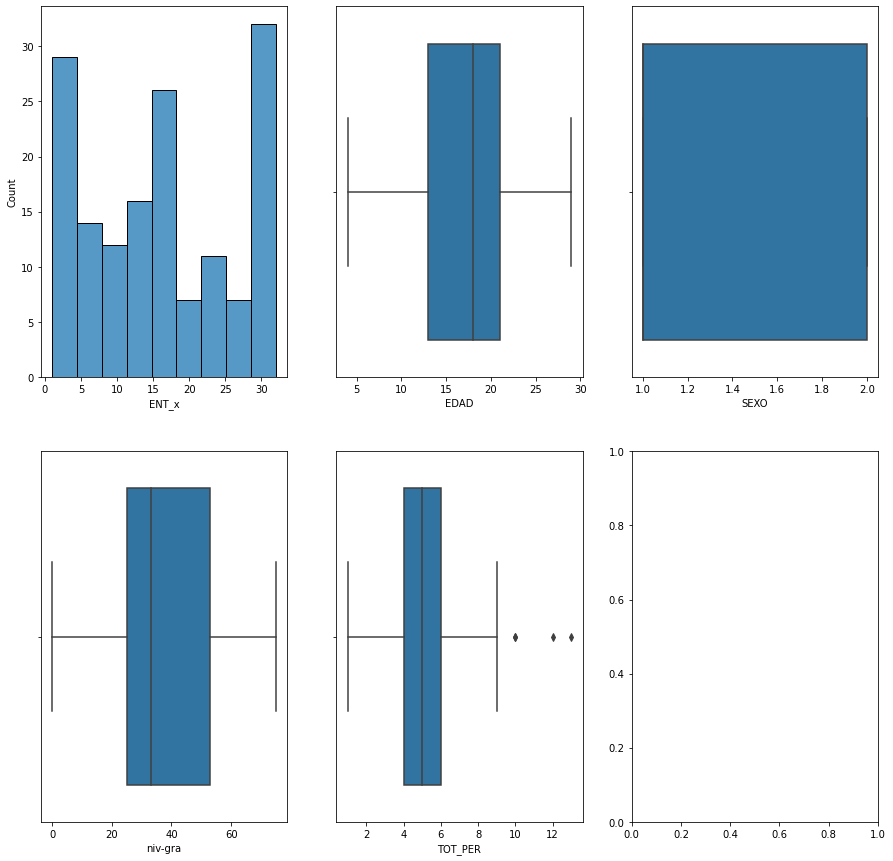

In [16]:
columns_for_checking_dist = ['ENT_x','EDAD', 'SEXO', 'niv-gra', 'TOT_PER']
n_cols = 3
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(15,15))
tmodulo_df_dropout = tmodulo_df_cleaned[tmodulo_df_cleaned.P3_7 == 2]

for i, column in enumerate(columns_for_checking_dist):
    if column == 'ENT_x':
        sns.histplot(x= tmodulo_df_dropout[column], ax=axes[i//n_cols,i%n_cols])
    else:
        sns.boxplot(x= tmodulo_df_dropout[column], ax=axes[i//n_cols,i%n_cols])


### Selección de variables


In [17]:
tmodulo_df_cleaned.dtypes

ENT_x         int64
CON          object
N_REN         int64
PAREN         int64
SEXO          int64
EDAD          int64
NIV           int64
GRA           int64
P3_5          int64
P3_6        float64
P3_7        float64
P3_8        float64
P3_9_1      float64
P3_9_2      float64
P3_9_3      float64
P3_9_4      float64
P3_9_5      float64
P3_9_6      float64
P3_9_7      float64
P3_9_8      float64
P3_9_9      float64
P3_10       float64
P3_11       float64
P3_12_1     float64
P3_12_2     float64
P3_12_3     float64
P3_12_4     float64
P3_12_5     float64
P3_12_6     float64
P3_12_7     float64
P3_12_8     float64
P3_12A      float64
P3_13       float64
P3_14         int64
P3_15       float64
P3_16       float64
P3_17_1     float64
P3_17_2     float64
P3_17_3     float64
P3_17_4     float64
P3_17_5     float64
P3_17_6     float64
P3_17_7     float64
P3_17_8     float64
P3_18       float64
P3_19_1     float64
P3_19_2     float64
P3_19_3     float64
P3_19_4     float64
P3_19_5     float64


Primeras variables a remover: 

variables de control
* CON
* N_REN
* FACTOR_x

variables repetidas
* ENT_y
* Factor_y

Removemos NIV y GRAD también, ya que niv-grad los contiene


In [18]:
tmodulo_df_fe = tmodulo_df_cleaned.drop(['CON', 'N_REN', 'FACTOR_x', 'ENT_y', 'FACTOR_y', 'NIV', 'GRA'], axis=1)
tmodulo_df_fe.head()

,ENT_x,PAREN,SEXO,EDAD,P3_5,P3_6,P3_7,P3_8,P3_9_1,P3_9_2,...,P4_3_1,P4_3_2,P4_3_3,P4_3_4,P4_3_5,P4_3_6,P4_3_7,P4_3_8,P4_3_9,niv-gra
0,1,1,1,9,1,1.0,1.0,1.487013,1.810127,1.78481,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24
2,1,1,1,8,1,1.0,1.0,1.487013,1.810127,1.78481,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
3,1,1,2,17,1,1.0,1.0,1.487013,1.810127,1.78481,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33
6,1,1,2,22,1,2.0,1.0,1.487013,1.810127,1.78481,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41
7,1,5,2,6,1,1.0,1.0,1.487013,1.810127,1.78481,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12


Removemos preguntas que evidentemente por contexto se relacionan con otras o son derivadas de otras

In [19]:
tmodulo_df_fe  = tmodulo_df_fe.drop(['P3_8'], axis = 1)
tmodulo_df_fe  = tmodulo_df_fe.drop(['P3_12_7'], axis = 1)
tmodulo_df_fe  = tmodulo_df_fe.drop(['P3_12_6'], axis = 1)

#### Análisis de correlación

Eliminamos las variables explicativas con alta correlación entre ellas mismas, ya que presentan información redundante

In [20]:
ind_var_corr = tmodulo_df_fe.loc[:, tmodulo_df_fe.columns != 'P3_7'].corr()
ind_var_corr

,ENT_x,PAREN,SEXO,EDAD,P3_5,P3_6,P3_9_1,P3_9_2,P3_9_3,P3_9_4,...,P4_3_1,P4_3_2,P4_3_3,P4_3_4,P4_3_5,P4_3_6,P4_3_7,P4_3_8,P4_3_9,niv-gra
ENT_x,1.000000,-0.015947,5.821367e-03,-0.009785,NaN,-2.884701e-02,1.492917e-02,6.156022e-03,2.073176e-02,-1.127430e-02,...,-0.064004,-1.699467e-02,-8.388821e-03,4.723875e-02,2.973686e-03,-5.256217e-03,-1.091942e-02,-1.359543e-02,7.708850e-02,-0.002698
PAREN,-0.015947,1.000000,2.117098e-02,0.295319,NaN,4.107772e-02,2.150081e-02,-2.011466e-02,6.522127e-03,-1.020694e-03,...,-0.062924,1.020920e-01,4.951643e-02,2.204865e-02,-2.437715e-03,1.042412e-01,-1.958835e-02,2.773812e-02,-1.721758e-02,0.289877
SEXO,0.005821,0.021171,1.000000e+00,0.002176,NaN,1.047103e-02,-1.775012e-02,-3.966468e-03,-1.215054e-02,5.388788e-03,...,-0.007897,2.093622e-02,8.670230e-03,-1.200629e-02,3.693099e-03,-1.128098e-02,-2.479634e-03,-2.548960e-02,-2.442587e-03,0.007670
EDAD,-0.009785,0.295319,2.176106e-03,1.000000,NaN,1.438462e-01,-5.455139e-03,-4.531566e-02,-1.275860e-03,2.205296e-02,...,-0.017734,1.259774e-01,9.216552e-02,2.217851e-02,-3.503181e-02,7.607689e-02,-3.296020e-02,1.523121e-02,-3.799442e-02,0.926264
P3_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P3_6,-0.028847,0.041078,1.047103e-02,0.143846,NaN,1.000000e+00,-1.399520e-04,-5.075491e-03,1.031067e-02,3.307311e-02,...,-0.007780,5.730879e-02,3.822305e-02,5.004481e-02,1.961768e-02,2.331635e-02,-2.652619e-02,2.038306e-02,-2.112360e-02,0.146954
P3_9_1,0.014929,0.021501,-1.775012e-02,-0.005455,NaN,-1.399520e-04,1.000000e+00,-1.789438e-02,-5.481613e-02,1.634830e-01,...,-0.008544,-9.838415e-03,-3.841386e-02,4.722203e-03,-1.020979e-02,3.580872e-03,-1.011077e-02,8.292023e-03,2.027536e-02,-0.013424
P3_9_2,0.006156,-0.020115,-3.966468e-03,-0.045316,NaN,-5.075491e-03,-1.789438e-02,1.000000e+00,-5.928998e-02,-1.631962e-01,...,-0.000652,-8.258197e-03,-9.013318e-03,-6.760070e-03,3.295726e-03,-2.589387e-02,-7.946554e-03,8.968782e-03,-5.288235e-03,-0.040986
P3_9_3,0.020732,0.006522,-1.215054e-02,-0.001276,NaN,1.031067e-02,-5.481613e-02,-5.928998e-02,1.000000e+00,-6.592372e-02,...,-0.009891,2.079244e-03,6.701009e-03,1.104439e-03,3.160440e-03,3.382220e-03,3.129789e-03,1.939356e-03,7.068888e-03,0.001922
P3_9_4,-0.011274,-0.001021,5.388788e-03,0.022053,NaN,3.307311e-02,1.634830e-01,-1.631962e-01,-6.592372e-02,1.000000e+00,...,0.022194,-6.201113e-03,-3.349979e-03,5.679080e-03,-1.584486e-02,7.577744e-03,-1.215956e-02,-3.157884e-03,-1.749275e-02,0.007504


<AxesSubplot:>

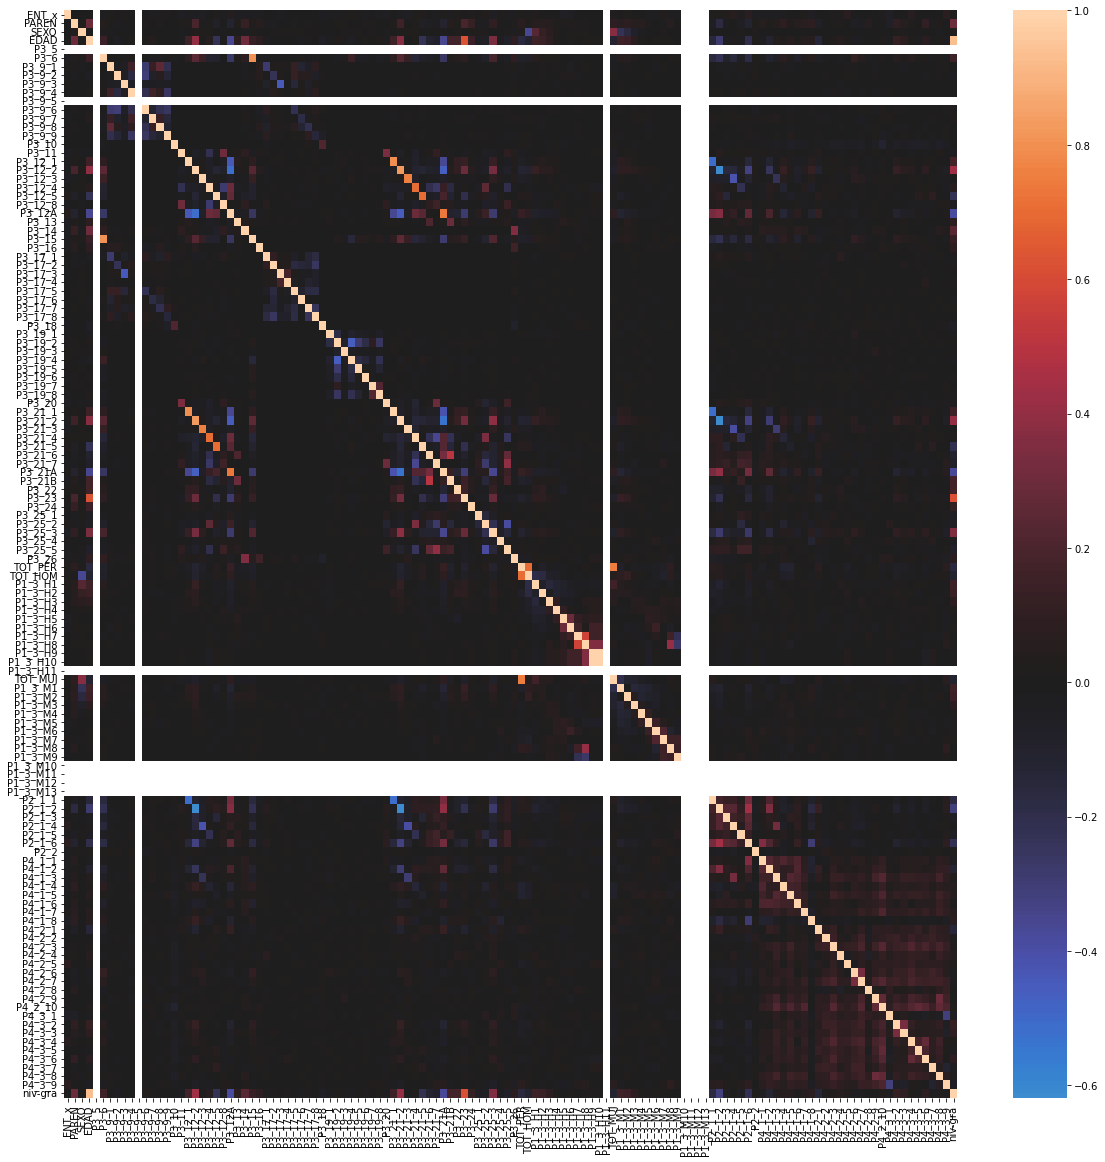

In [21]:
plt.figure(figsize=(20, 20))

sns.heatmap(ind_var_corr, 
        xticklabels=ind_var_corr.columns,
        yticklabels=ind_var_corr.columns, center=0)

In [22]:
upper = ind_var_corr.where(np.triu(np.ones(
    ind_var_corr.shape), k=1).astype(np.bool))
upper
# Encuentra variables con correlacion mayor a threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

to_drop

C:\Users\SALVAD~1.LUN\AppData\Local\Temp/ipykernel_33708/3011597713.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ind_var_corr.shape), k=1).astype(np.bool))


['P3_15', 'P3_21_2', 'P1_3_H10', 'niv-gra']

In [23]:
tmodulo_df_fe = tmodulo_df_fe.drop(to_drop, axis=1)
tmodulo_df_fe.dtypes

ENT_x         int64
PAREN         int64
SEXO          int64
EDAD          int64
P3_5          int64
P3_6        float64
P3_7        float64
P3_9_1      float64
P3_9_2      float64
P3_9_3      float64
P3_9_4      float64
P3_9_5      float64
P3_9_6      float64
P3_9_7      float64
P3_9_8      float64
P3_9_9      float64
P3_10       float64
P3_11       float64
P3_12_1     float64
P3_12_2     float64
P3_12_3     float64
P3_12_4     float64
P3_12_5     float64
P3_12_8     float64
P3_12A      float64
P3_13       float64
P3_14         int64
P3_16       float64
P3_17_1     float64
P3_17_2     float64
P3_17_3     float64
P3_17_4     float64
P3_17_5     float64
P3_17_6     float64
P3_17_7     float64
P3_17_8     float64
P3_18       float64
P3_19_1     float64
P3_19_2     float64
P3_19_3     float64
P3_19_4     float64
P3_19_5     float64
P3_19_6     float64
P3_19_7     float64
P3_19_8     float64
P3_20       float64
P3_21_1     float64
P3_21_3     float64
P3_21_4     float64
P3_21_5     float64


***Correlación de variables explicativas con la variable dependiente***

In [24]:
dep_var_corr = tmodulo_df_fe.corr().loc['P3_7', tmodulo_df_fe.columns != 'P3_7'].to_frame()
dep_var_corr[dep_var_corr.P3_7.notnull()]

,P3_7
ENT_x,-6.167045e-03
PAREN,2.465236e-02
SEXO,-6.027951e-03
EDAD,8.962007e-02
P3_6,5.808605e-02
P3_9_1,-4.311112e-16
P3_9_2,4.771400e-16
P3_9_3,-7.428645e-16
P3_9_4,5.713593e-18
P3_9_6,2.213585e-16


No existe un nivel suficientemente alto de correlación, para determinar si alguna de estas variables estuvieron correlacionadas con la deserción escolar durante el COVID-19, se procederán a realizar algunos métodos embebidos de seleccion de variables.

#### Métodos embebidos

Algunos algoritmos de aprendizaje máquina poseen la capacidad de determinar el nivel de importancia de las características (feature_importance) para predecir la variable dependiente. Utilizaremos el algoritmo de RandomForest sobre nuestro dataset para determinar las variables que tengan mayor correlación con la deserción escolar 


Debido a que los datos presentan sesgo hacia observaciones de alumnos que no abandonaron sus estudios, se hará un submuestreo para balancear los datos un poco

In [25]:
tmodulo_df_fe_sub = tmodulo_df_fe.copy()
tmodulo_df_fe_sub['P3_7'].value_counts()
tmodulo_df_fe_sub.rename(columns={'P3_7':'y'}, inplace=True)
tmodulo_df_fe_sub['y'] = tmodulo_df_fe_sub['y'].apply(lambda x: 1 if x == 2.0 else 0)
y_0 = tmodulo_df_fe_sub[tmodulo_df_fe_sub['y']==0]
y_1 = tmodulo_df_fe_sub[tmodulo_df_fe_sub['y']==1]
y_0 = y_0.sample(n=y_1.shape[0], random_state=152, replace=False)
tmodulo_df_fe_sub = pd.concat([y_1, y_0],ignore_index=True)
tmodulo_df_fe_sub = tmodulo_df_fe_sub.sample(frac=1.0).reset_index(drop=True)
tmodulo_df_fe_sub['y'].value_counts()

0    154
1    154
Name: y, dtype: int64

In [26]:
X =  tmodulo_df_fe_sub.loc[:, tmodulo_df_fe_sub.columns != 'y']
y = tmodulo_df_fe_sub['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.3,
                                                 random_state=984)

**Implementación de Random Forest**

In [27]:
model = RandomForestClassifier(random_state=13)
model.fit(X_train, y_train)
importance = model.feature_importances_
pd.DataFrame.from_dict({'variable':X.columns,'importance':importance}).sort_values(by='importance', ascending=False)

,variable,importance
19,P3_12_3,0.148204
22,P3_12_8,0.124554
17,P3_12_1,0.122869
20,P3_12_4,0.103651
21,P3_12_5,0.097446
18,P3_12_2,0.074094
16,P3_11,0.071334
23,P3_12A,0.039605
24,P3_13,0.027911
56,P3_25_1,0.014320


### Resultados


De acuerdo al modelo de RandomForest, las siguientes variables son las que más tienen correlación con el hecho de que un estudiante abandonara sus estudios durante la pandemia en México:

*	P3_12_3	con una importancia de 0.158515
*	P3_12_8	con una importancia de 0.113075
*	P3_12_5	con una importancia de 0.098215
*	P3_12_1	con una importancia de 0.096792
*	P3_12_4	con una importancia de 0.084492


Estas variables se refieren a las siguientes preguntas:
    
Pregunta P3.12.3 Durante pandemia por el COVID-19, ¿para sus actividades escolares o clases a distancia (NOMBRE) utilizó en el pasado año escolar tablet (pantalla táctil)?
Pregunta P3.12.8 No tuvo clases a distancia
Pregunta P3.12.5 Durante pandemia por el COVID-19, ¿para sus actividades escolares o clases a distancia (NOMBRE) utilizó en el pasado año escolar televisión digital (pantalla plana)?	
Pregunta P3.12.1 Durante pandemia por el COVID-19, ¿para sus actividades escolares o clases a distancia (NOMBRE) utilizó en el pasado año escolar computadora de escritorio?
regunta P3.12.4 Durante pandemia por el COVID-19, ¿para sus actividades escolares o clases a distancia (NOMBRE) utilizó en el pasado año escolar celular inteligente (Smartphone)?

Se observan que los principales factores que se relacionan con la deserción escolar durante la pandemia tienen que ver con los dispositivos y la conexión de internet que un estudiante tuvo para estar en constante comunicación con el profesor.

A continuación se grafica la distribución de los estudiantes que SI desertaron para estas preguntas:

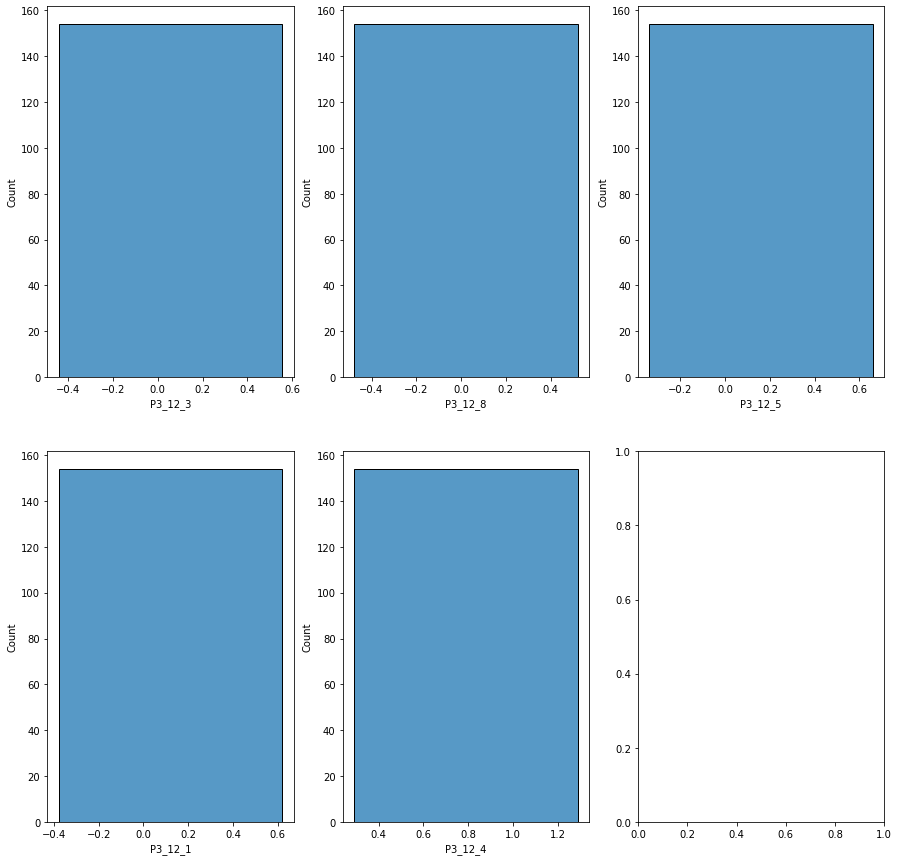

In [28]:
columns_for_checking_dist = ['P3_12_3','P3_12_8', 'P3_12_5', 'P3_12_1', 'P3_12_4']
n_cols = 3
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(15,15))
tmodulo_df_dropout = tmodulo_df_cleaned[tmodulo_df_cleaned.P3_7 == 2]

for i, column in enumerate(columns_for_checking_dist):
        sns.histplot(x= tmodulo_df_dropout[column], ax=axes[i//n_cols,i%n_cols])

P3_12_3  Durante pandemia por el COVID-19, ¿para sus actividades escolares o clases a distancia (NOMBRE) utilizó en el pasado año escolar tablet (pantalla táctil)?.	Muestra una distribución centrada a cero, cero equivale a "No se declaró como respuesta afirmativa"

P3.12.8 No tuvo clases a distancia. Muestra una distribución centrada en cero, cero equivale a "No se declaró como respuesta afirmativa"

P3_12_5. Durante pandemia por el COVID-19, ¿para sus actividades escolares o clases a distancia (NOMBRE) utilizó en el pasado año escolar televisión digital (pantalla plana)? Muestra una distribución centrada en cero, cero equivale a "No se declaró como respuesta afirmativa"

P3_12_1. Durante pandemia por el COVID-19, ¿para sus actividades escolares o clases a distancia (NOMBRE) utilizó en el pasado año escolar computadora de escritorio? Muestra una distribución centrada en cero, cero equivale a "No se declaró como respuesta afirmativa"

P3_12_1. Durante pandemia por el COVID-19, ¿para sus actividades escolares o clases a distancia (NOMBRE) utilizó en el pasado año escolar computadora de escritorio? Muestra una distribución centrada en cero, cero equivale a "No se declaró como respuesta afirmativa"
	
Pregunta P3.12.4 Durante pandemia por el COVID-19, ¿para sus actividades escolares o clases a distancia (NOMBRE) utilizó en el pasado año escolar celular inteligente (Smartphone)? Muestra una distribución centrada en 1, 1 equivale a "Si"